# Ανάλυση Εικόνων και Βίντεο

## Φώτιος Κούτσικος



## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [3]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import Precision, Recall, F1Score

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας.

In [5]:
team_seed = 82

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"
cifar100_labels_list_url = "https://pastebin.com/raw/qgDaNggt"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv("cifar100_classes.csv", sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv("CIFAR100_LABELS_LIST.csv", sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [8]:
# print our classes
print(our_classes)
print(len(our_classes))

[' beetle', ' bowl', ' boy', ' camel', ' can', ' cattle', ' chimpanzee', ' clock', ' fox', ' keyboard', ' lamp', ' rabbit', ' seal', ' shrew', ' snail', ' sweet_pepper', ' tractor', ' tulip', ' wardrobe', ' wolf']
20


In [9]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


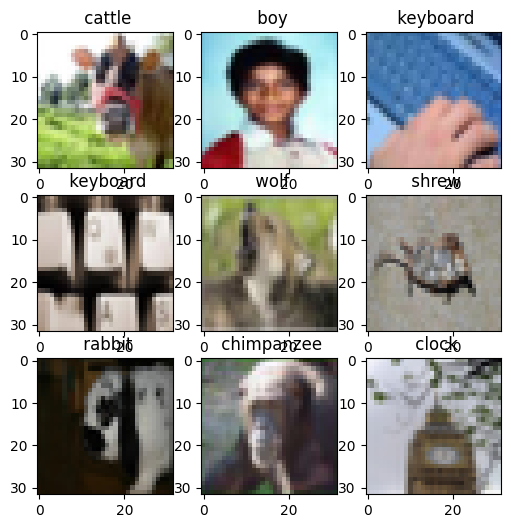

In [10]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
### Βήμα 1: Σχεδίαση και εκπαίδευση των μοντέλων

 Σχεδίαστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας τον ίδιο αλγορίθμο βελτιστοποίησης ([optimizer](https://keras.io/api/optimizers/)), την ίδια συνάρτηση κόστους [loss function](https://keras.io/api/losses/), το ίδιο μέγεθος παρτίδας (batch size) και 50 εποχές (epochs) `*`.

 Για την εκτίμηση της απόδοσης των μοντέλων να χρησιμοποιήσετε ως μετρική ([metrics](https://keras.io/api/metrics/)) την F1-score.


`*`
 Μπορείτε να πειραματιστείτε με τον optimizer, την loss function και το batch size για τα 4 μοντέλα πριν καταλήξετε στην τελική σας κοινή, για όλα τα μοντέλα επιλογή.


---
  
### Βήμα 2: Αξιολόγηση των μοντέλων

α. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε στο Βήμα 1, απεικονίστε σε κοινό διάγραμμα τα F1-scores εκπαίδευσης και επικύρωσης στο σύνολο των εποχών.

β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων.
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
---

### Βήμα 3: Αξιολόγηση F1-score
Αξιολογήστε τα F1-scores, χρησιμοποιώντας το σύνολο ελέγχου σας (test set).

---


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), ώστε το μοντέλο σας να γενικεύει καλύτερα, όπως:

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator))

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου

---


## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς το F1 score στην αντιμετώπιση της υπερεκπαίδεσης.

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

α. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

β. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

---
### Βήμα 2: Αξιολόγηση

Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου.

---

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


##Θεωρητικό Μέρος

Στα δεδομένα άρθρα προς μελέτη παρουσιάζονται τα CNN μοντέλα LeNet, AlexNet και VGG. Με βάση την περιγραφή του εκάστοτε μοντέλου και τις βοηθητικές υλοποιήσεις που δίνονται, προκύπτουν τα εξής χαρακτηριστικά:


| Model   | Layers | Filter Size                            | Activation Function | Parameters | Pooling/Dropout              |
| :------ | :----- | :------------------------------------- | :------------------ | :--------- | :--------------------------- |
| LeNet   | 2 Conv + 2 Subsampling + 1 FC      | 5x5                                    | 	Tanh ή Sigmoid             | ~2.578      | Average Pooling/No Dropout   |
| AlexNet | 5 Conv + 3 FC     | 11×11, 5×5, 3×3 | ReLU                | ~60M       | Max Pooling/Dropout=0\.5 |
| VGG     | 13–16 Conv + 3 FC    | 3x3 (μερικές 1x1)                                    | ReLU                | ~133-144M      | Max Pooling 2x2/Dropout |

Το LeNet δίκτυο εκπαιδεύτηκε και δοκιμάστηκε σε χειρόγραφα και τυπωμένα ψηφία ταχυδρομικών κωδικών και πέτυχε συνολικό σφάλμα 3.4% στο σετ 2.707 εικόνων.

Τα AlexNet και VGG αξιολογήθηκαν στο ImageNet, σημειώνοντας 17% και 7% top-5 σφάλμα αντίστοιχα.

Όπως μπορούμε να παρατηρήσουμε, σε μικρά και απλά datasets το LeNet είναι αρκετά αποδοτικό. Όμως σε πολύπλοκα datasets, όπως είναι οι φυσικές εικόνες, είναι χρήσιμο να χρησιμοποιούνται δίκτυα με περισσότερα layers μαζί με dropout / data augmentation. Συγκεκριμένα, μεταξύ των AlexNet και VGG, το δεύτερο είναι πιο αποδοτικό σε άποψη ακρίβειας διότι διαθέτει περισσότερα επίπεδα, έχοντας παράλληλα σημαντικά αργότερη εκπαίδευση.


# Υλοποίηση Αλγορίθμου

## **Ερώτημα 1**

**Βήμα 1**

Ξεκινάμε με τη δημιουργία των μοντέλων LeNet, AlexNet και VGG καθώς και ενός δικού μου μοντέλου, MyCNN.

Αρχικά, καθορίζουμε τις παραμέτρους που δίνονται από την εκφώνηση και θα χρειαστούμε.

In [11]:
batch_size = 64
epochs = 50
lr = 0.001
num_classes = 20

Θα χρησιμοποιήσουμε GPU προκειμένου να επιταχυνθεί η εκπαίδευση

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Δεδομένου ότι έχουν επιλεχθεί 20 από τις συνολικές 100 κλάσεις του CIFAR-100 dataset, πρέπει να κάνουμε mapping μεταξύ αυτών των κλάσεων που υπάρχουν στο δικό μας dataset και την αντιστοιχία τους με το αρχικό.

In [13]:
from tensorflow.keras.utils import to_categorical

unique_classes = np.unique(y_train)
unique_classes.sort()

label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_classes)}

y_train = np.asarray([label_mapping[int(label)] for label in y_train])
y_val = np.asarray([label_mapping[int(label)] for label in y_val])
y_test = np.asarray([label_mapping[int(label)] for label in y_test])

y_train = to_categorical(y_train, num_classes=20)
y_val = to_categorical(y_val, num_classes=20)
y_test = to_categorical(y_test, num_classes=20)

<ipython-input-13-e5f0f1790ee1>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.asarray([label_mapping[int(label)] for label in y_train])
<ipython-input-13-e5f0f1790ee1>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_val = np.asarray([label_mapping[int(label)] for label in y_val])
<ipython-input-13-e5f0f1790ee1>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.asarray([label_mapping[int(label)] for label in y_test])


Δημιουργούμε τώρα τα μοντέλα μας.

Σημαντική παρατήρηση είναι ότι χρειάστηκε να γίνει κάποιο scale-down των μοντέλων (κυρίως του AlexNet και του VGG), διότι στα άρθρα αντιστοιχούσαν σε πολύ μεγαλύτερο dataset και πολύ μεγαλύτερων διαστάσεων εικόνες.

In [43]:
LeNet = models.Sequential([
    layers.Conv2D(6, kernel_size=(5,5), activation='tanh', padding='same', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2,2), strides=2),
    layers.Conv2D(16, kernel_size=(5,5), activation='tanh'),
    layers.AveragePooling2D((2,2), strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(num_classes, activation='softmax')
])

LeNet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │         1,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,976 (328.03 KB)

 Trainable params: 83,976 (328.03 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
AlexNet = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
])

AlexNet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,596 (4.40 MB)

 Trainable params: 1,152,596 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
VGG = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


VGG.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 553,652 (2.11 MB)

 Trainable params: 552,756 (2.11 MB)

 Non-trainable params: 896 (3.50 KB)

Το MyCNN δεν είναι κάτι άλλο παρά μία παραλλαγή του LeNet με χρήση ReLU activation function.

In [17]:
MyCNN = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

MyCNN.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,316 (1.34 MB)

 Trainable params: 351,316 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

Εκτελούμε το compiling των μοντέλων μας με κοινό optimizer Adam και loss function Cross Entropy.

In [18]:
LeNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

AlexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

VGG.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

MyCNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)


In [ ]:
history_LeNet = LeNet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - f1_score: 0.1152 - loss: 2.8047 - val_f1_score: 0.2328 - val_loss: 2.4795
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.2708 - loss: 2.3884 - val_f1_score: 0.2908 - val_loss: 2.3251
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3105 - loss: 2.2814 - val_f1_score: 0.3137 - val_loss: 2.2746
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3310 - loss: 2.2160 - val_f1_score: 0.3231 - val_loss: 2.2103
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3688 - loss: 2.0888 - val_f1_score: 0.3433 - val_loss: 2.1735
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.3754 - loss: 2.0572 - val_f1_score: 0.3554 - val_loss: 2.1478
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.3943 - loss: 1.9620 - val_f1_score: 0.3708 - val_loss: 2.0989
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.4112 - loss: 1.9060 - val_f1_score: 

In [ ]:
history_AlexNet = AlexNet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - f1_score: 0.0740 - loss: 2.9100 - val_f1_score: 0.2017 - val_loss: 2.5060
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.2378 - loss: 2.4295 - val_f1_score: 0.3046 - val_loss: 2.2049
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.3404 - loss: 2.1337 - val_f1_score: 0.4173 - val_loss: 1.9582
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.4124 - loss: 1.9370 - val_f1_score: 0.4429 - val_loss: 1.7924
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.4573 - loss: 1.7476 - val_f1_score: 0.4781 - val_loss: 1.6369
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.5067 - loss: 1.5876 - val_f1_score: 0.5103 - val_loss: 1.5827
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.5248 - loss: 1.4839 - val_f1_score: 0.5266 - val_loss: 1.5577
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.5837 - loss: 1.3180 - val_f1_score: 

In [ ]:
history_VGG = VGG.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - f1_score: 0.0902 - loss: 3.2327 - val_f1_score: 0.0206 - val_loss: 3.0515
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.1780 - loss: 2.6756 - val_f1_score: 0.0438 - val_loss: 3.2178
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.2453 - loss: 2.4512 - val_f1_score: 0.1473 - val_loss: 2.7889
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.2907 - loss: 2.2757 - val_f1_score: 0.3631 - val_loss: 2.1119
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.3416 - loss: 2.1204 - val_f1_score: 0.3905 - val_loss: 1.9863
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.3979 - loss: 1.9324 - val_f1_score: 0.3807 - val_loss: 1.9865
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.4351 - loss: 1.7729 - val_f1_score: 0.4409 - val_loss: 1.8260
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.4748 - loss: 1.6547 - val_f1_score: 

In [ ]:
history_MyCNN = MyCNN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - f1_score: 0.0997 - loss: 2.8609 - val_f1_score: 0.2375 - val_loss: 2.4689
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.2759 - loss: 2.3446 - val_f1_score: 0.3578 - val_loss: 2.1315
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.3847 - loss: 2.0267 - val_f1_score: 0.3880 - val_loss: 2.0149
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.4502 - loss: 1.8000 - val_f1_score: 0.4419 - val_loss: 1.8056
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.5193 - loss: 1.5410 - val_f1_score: 0.4742 - val_loss: 1.7177
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.5614 - loss: 1.4045 - val_f1_score: 0.4949 - val_loss: 1.6508
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.6152 - loss: 1.2473 - val_f1_score: 0.4897 - val_loss: 1.6851
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.6656 - loss: 1.0913 - val_f1_score: 0

**Βήμα 2**

α. Η αναπαράσταση των F1-scores εκπαίδευσης και επικύρωσης σε κοινά διαγράμματα για κάθε μοντέλο.

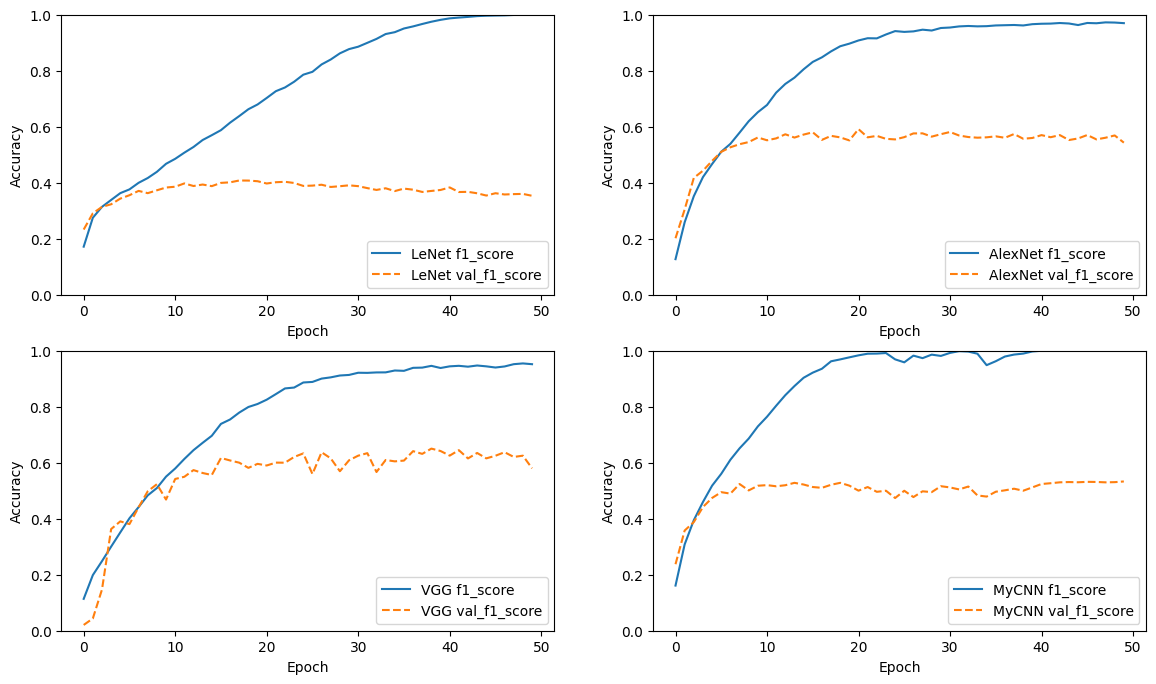

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(history_LeNet.history['f1_score'], label='LeNet f1_score')
plt.plot(history_LeNet.history['val_f1_score'], label = 'LeNet val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

plt.subplot(2,2,2)
plt.plot(history_AlexNet.history['f1_score'], label='AlexNet f1_score')
plt.plot(history_AlexNet.history['val_f1_score'], label = 'AlexNet val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

plt.subplot(2,2,3)
plt.plot(history_VGG.history['f1_score'], label='VGG f1_score')
plt.plot(history_VGG.history['val_f1_score'], label = 'VGG val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

plt.subplot(2,2,4)
plt.plot(history_MyCNN.history['f1_score'], label='MyCNN f1_score')
plt.plot(history_MyCNN.history['val_f1_score'], label = 'MyCNN val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

plt.show()

Επίσης κοινή αναπαράσταση όλων των αποτελεσμάτων σε ένα διάγραμμα, προκειμένου να είναι πιο εύκολη η σύγκριση μεταξύ μοντέλων.

63/63 - 2s - 26ms/step - f1_score: 0.3467 - loss: 3.8014


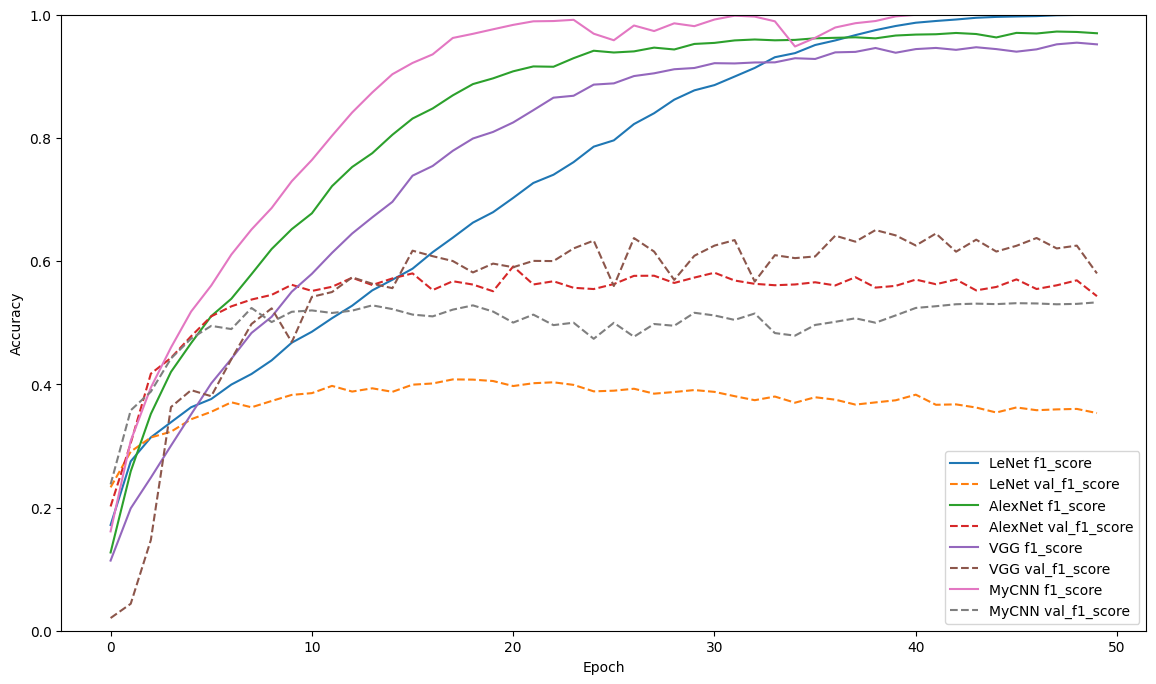

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(history_LeNet.history['f1_score'], label='LeNet f1_score')
plt.plot(history_LeNet.history['val_f1_score'], label = 'LeNet val_f1_score',  linestyle='--')
plt.plot(history_AlexNet.history['f1_score'], label='AlexNet f1_score')
plt.plot(history_AlexNet.history['val_f1_score'], label = 'AlexNet val_f1_score',  linestyle='--')
plt.plot(history_VGG.history['f1_score'], label='VGG f1_score')
plt.plot(history_VGG.history['val_f1_score'], label = 'VGG val_f1_score',  linestyle='--')
plt.plot(history_MyCNN.history['f1_score'], label='MyCNN f1_score')
plt.plot(history_MyCNN.history['val_f1_score'], label = 'MyCNN val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc = LeNet.evaluate(x_test,  y_test, verbose=2)

β. Σχολιασμός των αποτελεσμάτων

#### *Επίδραση του πλήθους των δεδομένων/κλάσεων*

Το dataset περιλάμβανε 20 κλάσεις επιλεγμένες τυχαία από το πλήρες CIFAR-100 dataset, με βάση προκαθορισμένο seed = 82. Το περιορισμένο πλήθος δεδομένων επέτρεψε στα βαθύτερα μοντέλα, όπως το VGG και το AlexNet, να εκμεταλλευτούν την ικανότητα τους να μάθουν πολύπλοκα χαρακτηριστικά, επιτυγχάνοντας υψηλά Validation F1-scores.
Αντίθετα, το απλούστερο LeNet, αν και κατάφερε πολύ υψηλό Training F1 (~ 1.0), εμφάνισε σημαντικότερο overfitting, με το χαμηλότερο Validation F1-score (~ 0.5), δείχνοντας αδυναμία γενίκευσης.
Το MyCNN, παρόμοια με το LeNet παρουσίασε εκπληκτική επίδοση F1-score, με καλύτερη γενίκευση, αλλά σε γενικές γραμμές αρκετό overfitting.


#### *Επίδραση του optimizer*
Ο Adam optimizer συνέβαλε σημαντικά στη γρήγορη και σταθερή εκμάθηση σε όλα τα μοντέλα, ιδίως στο MyCNN, το οποίο εμφάνισε την πιο απότομη άνοδο Training F1 Score.
Παρά τη βοήθεια του optimizer, η τελική απόδοση κάθε μοντέλου καθορίστηκε κυρίως από την καταλληλότητα της αρχιτεκτονικής του σε σχέση με την πολυπλοκότητα των δεδομένων. Μοντέλα όπως το VGG, πιο ισχυρά σε παραμέτρους, επωφελήθηκαν περισσότερο από τον Adam, ενώ τα απλούστερα μοντέλα δεν κατάφεραν να εκμεταλλευτούν πλήρως τις δυνατότητές του.

#### *Επίδραση του batch size*
Το επιλεγμένο batch size (64) προσέφερε καλή ισορροπία μεταξύ σταθερότητας εκπαίδευσης και ταχύτητας σύγκλισης.
Δεν παρατηρήθηκαν ακραίες διακυμάνσεις στα Training F1 curves, εκτός από το MyCNN, κάτι που δείχνει ότι το batch size βοήθησε σε ομαλή εκμάθηση σε όλα τα μοντέλα.

**Βήμα 3**

Τώρα, για να γίνει αξιολόγηση των F1-scores, χρησιμοποιώντας το test set, δημιουργούμε την συνάρτηση evaluate_model, η οποία υπολογίζει το F1-score μέσω του τύπου:

$$F1 = 2\frac{Precision \times Recall}{Precision+Recall}$$

In [ ]:
def evaluate_model (model, x_test, y_test):
    # Predict probabilities
    y_pred_probs = model.predict(x_test)

    # Predict classes
    y_pred_classes = tf.argmax(y_pred_probs, axis=1)
    y_true_classes = tf.argmax(y_test, axis=1)

    # Calculate F1 Score manually
    precision = Precision()
    recall = Recall()

    precision.update_state(y_true_classes, y_pred_classes)
    recall.update_state(y_true_classes, y_pred_classes)

    prec = precision.result().numpy()
    rec = recall.result().numpy()

    f1 = 2 * (prec * rec) / (prec + rec)

    # Calculate Accuracy
    accuracy = tf.keras.metrics.Accuracy()
    accuracy.update_state(y_true_classes, y_pred_classes)
    acc = accuracy.result().numpy()

    return f1, acc

In [ ]:
f1_LeNet, acc_LeNet = evaluate_model(LeNet, x_test, y_test)
f1_AlexNet, acc_AlexNet = evaluate_model(AlexNet, x_test, y_test)
f1_VGG, acc_VGG = evaluate_model(VGG, x_test, y_test)
f1_MyCNN, acc_MyCNN = evaluate_model(MyCNN, x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
data = {'Model': ['LeNet', 'AlexNet', 'VGG', 'MyCNN'],
        'F1-Score': [f1_LeNet, f1_AlexNet, f1_VGG, f1_MyCNN],
        'Accuracy': [acc_LeNet, acc_AlexNet, acc_VGG, acc_MyCNN]}
df = pd.DataFrame(data)

print(df)

     Model  F1-Score  Accuracy
0    LeNet  0.972660    0.3470
1  AlexNet  0.981856    0.5435
2      VGG  0.978622    0.5845
3    MyCNN  0.976769    0.5050


Από τα αποτελέσματα αξιολόγησης στο test set, παρατηρείται ότι όλα τα μοντέλα πέτυχαν πολύ υψηλά F1-scores (άνω του 95%), γεγονός που υποδεικνύει ότι κατάφεραν να μάθουν σωστά τις κλάσεις στις οποίες εκπαιδεύτηκαν. Το AlexNet εμφάνισε το υψηλότερο F1-Score (~ 98.19%), ενώ το VGG πέτυχε τη μέγιστη Test Accuracy (~ 58.45%), υποδηλώνοντας καλύτερη ισορροπία μεταξύ precision και recall σε όλες τις κλάσεις.

Το LeNet, αν και πέτυχε υψηλό training F1, εμφάνισε χαμηλή τελική accuracy (~ 34.7%), γεγονός που υποδηλώνει overfitting. Το MyCNN, παρότι απλούστερο, κατάφερε πολύ ικανοποιητικό F1-score (~ 97.67%) και αξιοπρεπή accuracy (~ 50%).

## **Ερώτημα 2**

To MyCNN με προσθήκη Dropout

In [ ]:
MyCNN_Dropout = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Τώρα εκτελλούμε data augmentation, δηλαδή προσθέτουμε διάφορες παραμορφώσεις στις ήδη υπάρχουσες εικόνες, χρησιμοποιώντας το Image Data Generator.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(x_train)

Οπτικοποιούμε τις παραμορφωμένες εικόνες για να γίνει κατανοητό.

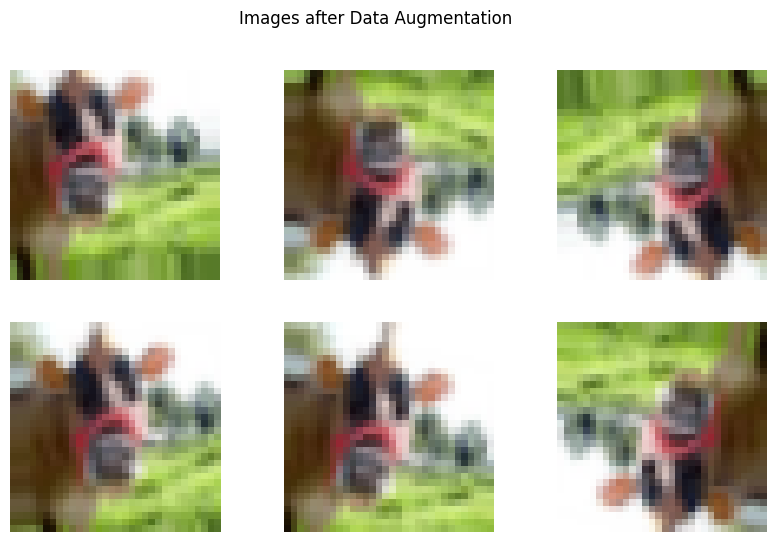

In [ ]:
sample_image = x_train[0]
sample_label = y_train[0]

sample_image = np.expand_dims(sample_image, 0)

augmented_images = datagen.flow(sample_image, batch_size=1)

plt.figure(figsize=(10, 6))
for i in range(6):
    batch = next(augmented_images)
    plt.subplot(2, 3, i+1)
    plt.imshow(batch[0])
    plt.axis('off')
plt.suptitle("Images after Data Augmentation")
plt.show()

Γίνεται το compiling και η εκπαίδευση του μοντέλου μία σε κανονικά δεδομένα και μία στα augmented.

In [ ]:
MyCNN_Dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

In [ ]:
history_MyCNN_Dropout = MyCNN_Dropout.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - f1_score: 0.0443 - loss: 2.9960 - val_f1_score: 0.1197 - val_loss: 2.7706
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.1173 - loss: 2.7730 - val_f1_score: 0.2035 - val_loss: 2.6030
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.1957 - loss: 2.5863 - val_f1_score: 0.2630 - val_loss: 2.3884
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.2415 - loss: 2.4645 - val_f1_score: 0.3134 - val_loss: 2.2482
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.2606 - loss: 2.3802 - val_f1_score: 0.3321 - val_loss: 2.2059
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.2881 - loss: 2.3100 - val_f1_score: 0.3621 - val_loss: 2.1304
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3031 - loss: 2.2426 - val_f1_score: 0.3641 - val_loss: 2.0951
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.3278 - loss: 2.1853 - val_f1_score: 

In [ ]:
history_MyCNN_Aug = MyCNN_Dropout.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - f1_score: 0.3221 - loss: 2.3535 - val_f1_score: 0.4886 - val_loss: 1.6988
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - f1_score: 0.3269 - loss: 2.1968 - val_f1_score: 0.5271 - val_loss: 1.6484
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - f1_score: 0.3325 - loss: 2.1542 - val_f1_score: 0.5122 - val_loss: 1.6852
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - f1_score: 0.3174 - loss: 2.2198 - val_f1_score: 0.5025 - val_loss: 1.7354
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - f1_score: 0.3386 - loss: 2.1491 - val_f1_score: 0.5156 - val_loss: 1.6757
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - f1_score: 0.3580 - loss: 2.1070 - val_f1_score: 0.4892 - val_loss: 1.7267
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - f1_score: 0.3517 - loss: 2.0843 - val_f1_score: 0.5105 - val_loss: 1.6533
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - f1_score: 0.3449 - loss: 2.0949 - val_f1_score: 0.50

Αναπαράσταση των αποτελεσμάτων των F1-scores.

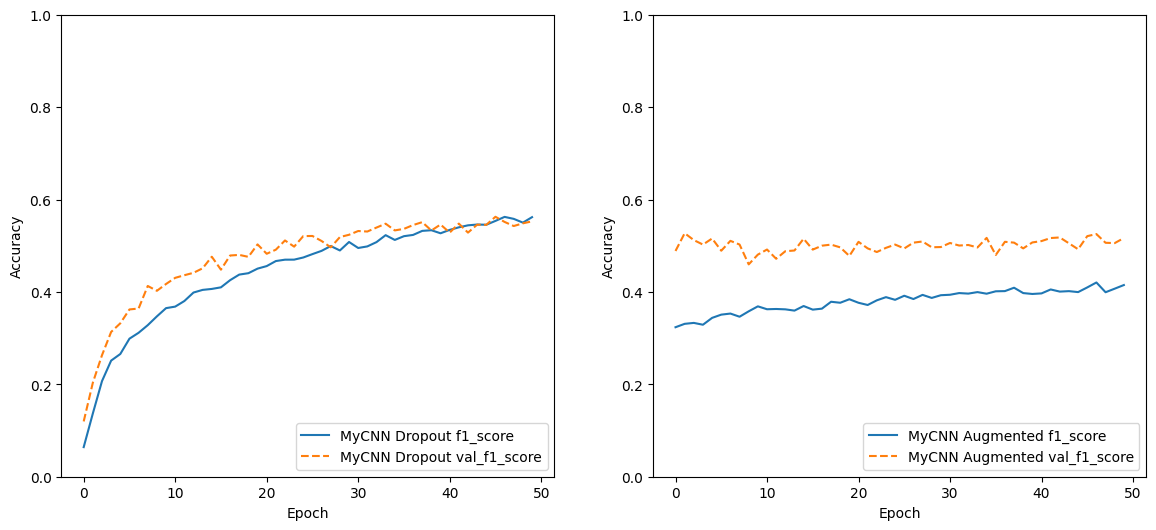

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history_MyCNN_Dropout.history['f1_score'], label='MyCNN Dropout f1_score')
plt.plot(history_MyCNN_Dropout.history['val_f1_score'], label = 'MyCNN Dropout val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_MyCNN_Aug.history['f1_score'], label='MyCNN Augmented f1_score')
plt.plot(history_MyCNN_Aug.history['val_f1_score'], label = 'MyCNN Augmented val_f1_score',  linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

Στο πρώτο πείραμα, εφαρμόστηκε Dropout σε ενδιάμεσα και τελικά επίπεδα του MyCNN μοντέλου. Το training F1-score αυξήθηκε σταθερά και το validation F1-score κατέληξε κοντά στο training F1 (~ 0.58), υποδεικνύοντας ότι το Dropout βοήθησε στη μείωση της υπερεκπαίδευσης.

Στο δεύτερο πείραμα, με χρήση Data Augmentation, το μοντέλο εκπαιδεύτηκε σε πιο δύσκολα και μετασχηματισμένα δεδομένα. Το training F1-score παρέμεινε χαμηλότερο (~ 0.42), αλλά το validation F1-score διατηρήθηκε πιο σταθερό (~ 0.50), γεγονός που δείχνει καλύτερη γενίκευση.

Συνολικά, η χρήση Dropout και Data Augmentation συντέλεσε στη βελτίωση της ικανότητας του μοντέλου να γενικεύει σε μη εκπαιδευμένα δεδομένα, μειώνοντας την απόκλιση μεταξύ training και validation F1-scores.

## **Ερώτημα 3**
**Βήμα 1**

α. Η καλύτερη παραλλαγή του μοντέλου MyCNN αποδείχθηκε το MyCNN_Dropout, ως προς το F1-score.

In [19]:
from tensorflow.keras.applications import VGG19, EfficientNetB0

In [20]:
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False

en_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
en_base.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
tl_model_vgg = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(num_classes)
])

tl_model_enb0 = models.Sequential([
    en_base,
    layers.Flatten(),
    layers.Dense(num_classes)
])

In [27]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input

Για τη σωστή χρήση των μοντέλων VGG19 και EfficientNetB0 μέσω tf.keras.applications, χρειάζεται να εφαρμοστεί η προεπεξεργασία (preprocess_input) που απαιτείται από κάθε αρχιτεκτονική. Στην περίπτωση του VGG19, τα δεδομένα κανονικοποιούνται με βάση τα στατιστικά του ImageNet, το οποίο περιλαμβάνει εικόνες με pixel values [0, 255]. Επειδή οι εικόνες του CIFAR-100 έχουν προεπεξεργαστεί στο [0,1] διάστημα (λόγω διαίρεσης με 255 παραπάνω), χρειάστηκε πρώτα να πολλαπλασιάσουμε το x_train, x_val, x_test με 255 ώστε να επιστρέψουν στο αρχικό εύρος τιμών πριν εφαρμοστεί το preprocess_input.

In [31]:
x_train_vgg = preprocess_input(x_train*255)
x_val_vgg = preprocess_input(x_val*255)
x_test_vgg = preprocess_input(x_test*255)

x_train_enb0 = preprocess_input(x_train*255)
x_val_enb0 = preprocess_input(x_val*255)
x_test_enb0 = preprocess_input(x_test*255)

In [32]:
tl_model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

tl_model_enb0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

In [33]:
history_tl_model_vgg = tl_model_vgg.fit(x_train_vgg, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_vgg, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - f1_score: 0.0708 - loss: 9.0243 - val_f1_score: 0.0843 - val_loss: 8.6098
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - f1_score: 0.0738 - loss: 8.4969 - val_f1_score: 0.0869 - val_loss: 8.4470
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - f1_score: 0.0838 - loss: 8.2641 - val_f1_score: 0.0895 - val_loss: 8.7202
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - f1_score: 0.0827 - loss: 8.8482 - val_f1_score: 0.0954 - val_loss: 8.4471
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - f1_score: 0.0882 - loss: 8.7905 - val_f1_score: 0.0935 - val_loss: 8.5237
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - f1_score: 0.0892 - loss: 8.9912 - val_f1_score: 0.0825 - val_loss: 8.5333
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - f1_score: 0.0762 - loss: 8.6089 - val_f1_score: 0.0822 - val_loss: 8.0918
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - f1_score: 0.0813 - loss: 8.5693 - val_f1_s

In [34]:
history_tl_model_enb0 = tl_model_enb0.fit(x_train_enb0, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_enb0, y_val))

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 43s 175ms/step - f1_score: 0.0278 - loss: 8.6973 - val_f1_score: 0.0214 - val_loss: 9.2640
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0291 - loss: 9.3459 - val_f1_score: 0.0246 - val_loss: 9.4891
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0330 - loss: 9.2683 - val_f1_score: 0.0273 - val_loss: 8.8440
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0370 - loss: 9.1265 - val_f1_score: 0.0304 - val_loss: 9.6175
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0400 - loss: 9.1216 - val_f1_score: 0.0385 - val_loss: 9.8645
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0435 - loss: 9.5987 - val_f1_score: 0.0409 - val_loss: 9.5742
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0396 - loss: 9.3824 - val_f1_score: 0.0342 - val_loss: 9.0802
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0389 - loss: 9.2420 - val_f1_score:

Στο πρώτο βήμα της μεταφοράς γνώσης (transfer learning), διατηρήθηκε η συνελικτική βάση των προεκπαιδευμένων μοντέλων VGG19 και EfficientNetB0 "παγωμένη" (trainable=False), και εκπαιδεύτηκε μόνο η νέα κεφαλή ταξινόμησης. Το παρατηρηθέν Validation F1-Score ήταν αρκετά χαμηλό (~0.1 για το VGG19 και ~0.03 για το EfficientNet), γεγονός που είναι αναμενόμενο, καθώς τα προεκπαιδευμένα μοντέλα (VGG19 και EfficientNetB0) έχουν μάθει χαρακτηριστικά πάνω σε πολύ μεγαλύτερες εικόνες (224×224) και σε διαφορετικό είδος δεδομένων (1000 κλάσεις ImageNet). Εδώ όμως χρησιμοποιούμε πολύ μικρότερες εικόνες (32×32) και λιγότερες κλάσεις (20), με αποτέλεσμα η βάση να μην αναγνωρίζει σωστά τα νέα δεδομένα χωρίς περαιτέρω προσαρμογή.

β. Προκειμένου να εκπαιδεύσουμε μόνο ένα ποσοστό των επιπέδων, αυτό που θα γίνει είναι να "ξεπαγώσουμε" (flag trainable = True) μερικά από τα επίπεδα ένα-ένα.

Έστω ότι "ξεπαγώνουμε" 20 επίπεδα.

In [42]:
for layer in vgg_base.layers[-20:]:
    layer.trainable = True

for layer in en_base.layers[-20:]:
    layer.trainable = True


In [39]:
tl_model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

tl_model_enb0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[F1Score(average='macro', threshold=None)]
)

In [40]:
history_tl_model_vgg = tl_model_vgg.fit(x_train_vgg, y_train, batch_size=batch_size, epochs=20, validation_data=(x_val_vgg, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - f1_score: 0.0049 - loss: 8.9547 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - f1_score: 0.0050 - loss: 8.9176 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - f1_score: 0.0046 - loss: 8.9059 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - f1_score: 0.0046 - loss: 8.9224 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - f1_score: 0.0046 - loss: 9.0317 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - f1_score: 0.0047 - loss: 8.8414 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - f1_score: 0.0044 - loss: 8.9025 - val_f1_score: 0.0048 - val_loss: 8.6071
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - f1_score: 0.0050 - loss: 8.9197 - v

In [41]:
history_tl_model_enb0 = tl_model_enb0.fit(x_train_enb0, y_train, batch_size=batch_size, epochs=20, validation_data=(x_val_enb0, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 48s 186ms/step - f1_score: 0.0389 - loss: 8.1883 - val_f1_score: 0.0536 - val_loss: 8.1860
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - f1_score: 0.0386 - loss: 8.0442 - val_f1_score: 0.0529 - val_loss: 7.6828
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - f1_score: 0.0381 - loss: 8.0306 - val_f1_score: 0.0405 - val_loss: 8.1104
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0325 - loss: 8.1956 - val_f1_score: 0.0409 - val_loss: 8.0767
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0396 - loss: 7.9853 - val_f1_score: 0.0371 - val_loss: 8.0692
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.0366 - loss: 8.1196 - val_f1_score: 0.0388 - val_loss: 8.1843
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - f1_score: 0.0408 - loss: 8.1837 - val_f1_score: 0.0391 - val_loss: 8.1988
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0403 - loss: 8.1374 - val_f1_sco

**Βήμα 2**

Παρατηρούμε ότι το validation F1-score μειώθηκε, πιθανόν λόγω υπoπροσαρμογής (underfitting) στα δεδομένα εκπαίδευσης, ή αλλοίωσης των μεταφερμένων χαρακτηριστικών της βάσης. Δεδομένου του μικρού μεγέθους του dataset (32×32 εικόνες, 20 κλάσεις), τα γενικά χαρακτηριστικά της προεκπαιδευμένης βάσης φαίνεται να ήταν ήδη επαρκή. Συνεπώς, η εκπαίδευση επιπλέον επιπέδων δεν προσέφερε όφελος και, σε αυτήν την περίπτωση, η μεταφορά γνώσης χωρίς fine-tuning λειτούργησε καλύτερα.